In [5]:
import nltk
import pandas as pd
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

In [6]:
# Read the data
data = pd.read_csv('cleaned_reviewss.csv')
sents = data['Review']

In [7]:
# Define a function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    return tokens

In [8]:
# Tokenize and preprocess the data
data['Review'] = data['Review'].fillna("")
data_list = list(data['Review'].apply(preprocess_text))

In [9]:
# Train an N-Gram model (2-gram in this case)
n = 2
train_data, padded_sents = padded_everygram_pipeline(n, data_list)
model = MLE(n)
model.fit(train_data, padded_sents)

In [10]:
# Print some N-Gram model information
print("Vocabulary size:", len(model.vocab))
print("Vocabulary:", model.vocab)
print("N-Gram count for 'tasty':", model.counts['tasty'])
print("N-Gram count for 'food' after 'tasty':", model.counts[['tasty']]['food'])
print("Score for 'food' after 'tasty':", model.score('food', 'tasty'.split()))

Vocabulary size: 3898
Vocabulary: <Vocabulary with cutoff=1 unk_label='<UNK>' and 3898 items>
N-Gram count for 'tasty': 27
N-Gram count for 'food' after 'tasty': 2
Score for 'food' after 'tasty': 0.07407407407407407


In [11]:
# Load the training data for TF-IDF
df_train = pd.read_csv('cleaned_reviewss.csv', index_col=0)
df_train = df_train.head(5)
df_train['Review'] = df_train['Review'].fillna("")
data_list_train = list(df_train['Review'].apply(preprocess_text))

In [12]:
# Define a function to tokenize and stem the text
def tokenize(text):
    tokens = word_tokenize(text)
    stems = [PorterStemmer().stem(item) for item in tokens]
    return stems

In [13]:
# Create a TF-IDF vectorizer with tokenization and stemming
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidf_result = tfidf.fit_transform(df_train['Review'])

C:\Users\jugal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

In [14]:
# Print TF-IDF vocabulary and values for the first document
print("\nTF-IDF Vocabulary:")
print(tfidf.vocabulary_)
print("\nTF-IDF Values for the First Document:")
print(tfidf_result[0].toarray())


TF-IDF Vocabulary:
{'thi': 47, 'place': 37, 'time': 49, 'prakash': 40, 'alway': 3, 'veri': 54, 'sweet': 46, 'accommod': 1, 'plu': 39, 'ask': 5, 'vaibhav': 53, 'make': 30, 'shake': 45, 'perfect': 35, 'recent': 41, 'visit': 55, 'oliv': 32, 'brown': 8, 'weekend': 58, 'cup': 16, 'ice': 24, 'coffe': 14, 'wa': 56, 'thoroughli': 48, 'impress': 26, 'ambienc': 4, 'invit': 27, 'seat': 42, 'comfort': 15, 'servic': 44, 'topnotch': 51, 'pleasur': 38, 'tri': 52, 'dark': 17, 'hot': 23, 'chocol': 13, 'absolut': 0, 'delici': 18, 'excel': 19, 'overal': 34, 'im': 25, 'alreadi': 2, 'look': 28, 'forward': 20, 'wateri': 57, 'chees': 11, 'burst': 10, 'pizza': 36, 'onli': 33, 'cheez': 12, 'happi': 22, 'sent': 43, 'today': 50, 'yammitest': 59, 'burger': 9, 'best': 7, 'love': 29, 'bergerand': 6, 'fri': 21, 'miss': 31}

TF-IDF Values for the First Document:
[[0.         0.25315511 0.         0.50631022 0.         0.25315511
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

In [15]:
# Display the top 30 TF-IDF terms for the first document
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_result[0].T.todense(), index=feature_names, columns=['TF-IDF'])
tfidf_df = tfidf_df.sort_values(by=['TF-IDF'], ascending=False)
print("\nTop 30 TF-IDF Terms for the First Document:")
print(tfidf_df.head(30))


Top 30 TF-IDF Terms for the First Document:
              TF-IDF
alway       0.506310
make        0.253155
vaibhav     0.253155
perfect     0.253155
plu         0.253155
prakash     0.253155
sweet       0.253155
time        0.253155
accommod    0.253155
ask         0.253155
veri        0.204244
shake       0.204244
place       0.204244
thi         0.204244
thoroughli  0.000000
wateri      0.000000
onli        0.000000
overal      0.000000
weekend     0.000000
pizza       0.000000
topnotch    0.000000
pleasur     0.000000
today       0.000000
oliv        0.000000
recent      0.000000
tri         0.000000
sent        0.000000
servic      0.000000
visit       0.000000
wa          0.000000


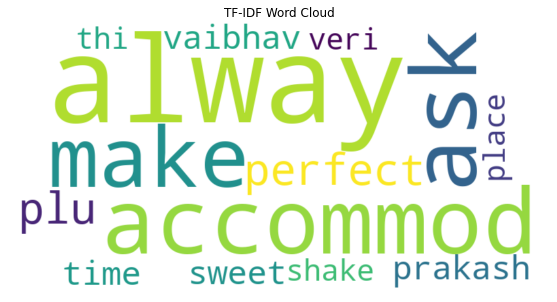

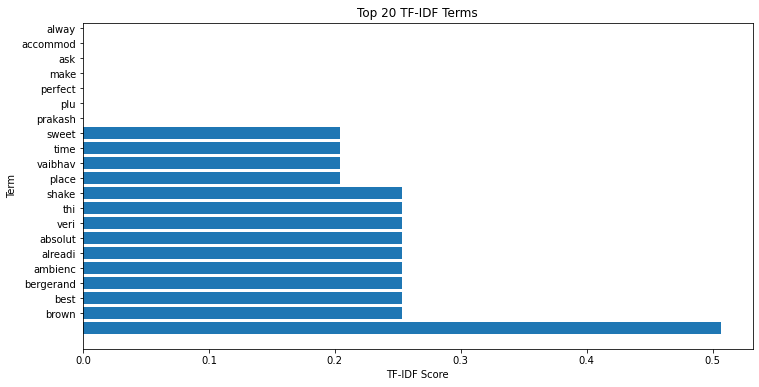

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud from the TF-IDF scores
tfidf_scores = tfidf_result[0].toarray().flatten()
tfidf_word_scores = dict(zip(feature_names, tfidf_scores))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_word_scores)

# Visualize TF-IDF using a word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("TF-IDF Word Cloud")
plt.show()

# Sort terms by TF-IDF scores for bar plot
sorted_terms = sorted(tfidf_word_scores.items(), key=lambda x: x[1], reverse=True)
top_terms = sorted_terms[:20]  # Display the top 20 terms

# Create a bar plot for the top TF-IDF terms
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_terms)), [score for term, score in top_terms], align='center')
plt.yticks(range(len(top_terms), 0, -1), [term for term, score in top_terms])
plt.xlabel("TF-IDF Score")
plt.ylabel("Term")
plt.title("Top 20 TF-IDF Terms")
plt.show()


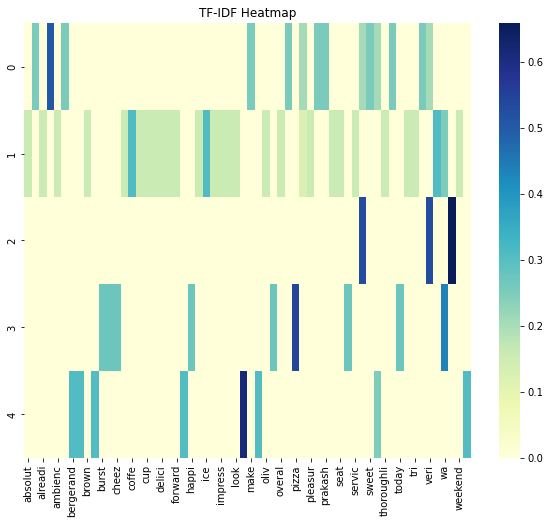

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the TF-IDF result
tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns=feature_names)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_df, cmap="YlGnBu", annot=False)
plt.title("TF-IDF Heatmap")
plt.show()


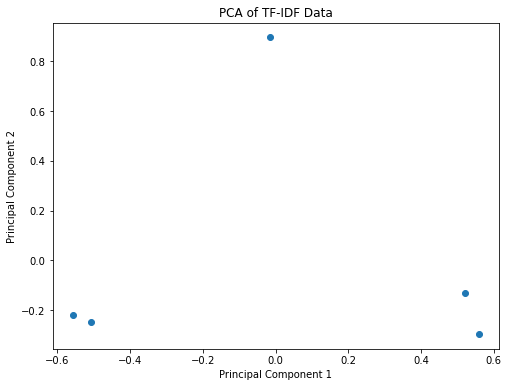

In [22]:
from sklearn.decomposition import PCA

# Perform PCA on the TF-IDF data
num_components = 2  # You can choose the number of components to visualize
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(tfidf_result.toarray())

# Create a scatter plot for the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=1)
plt.title("PCA of TF-IDF Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
